<a href="https://colab.research.google.com/github/tc3oliver/LangChain-Guide/blob/dev/11_load_data_from_html.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install goose3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 984.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=aa844f8f6a700993cde0290cdfd14858a81564749d54bd678162812de5c5a46f
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
from goose3 import Goose

In [12]:
url = 'https://www.ithome.com.tw/news/158196'
g = Goose()
article = g.extract(url=url)
article.title


'研究顯示ChatGPT寫程式的問題解答正確率不到五成，但很容易被採信'

In [13]:
article.meta_description

'美國普度大學研究顯示，OpenAI ChatGPT在程式撰寫上給的建議，正確率竟不到5成，但有4成時候人類無法察覺'

In [14]:
article.cleaned_text

''

In [15]:
article.infos

{'meta': {'description': '美國普度大學研究顯示，OpenAI ChatGPT在程式撰寫上給的建議，正確率竟不到5成，但有4成時候人類無法察覺',
  'lang': 'zh',
  'keywords': '',
  'favicon': 'https://www.ithome.com.tw/favicon.ico',
  'canonical': 'https://www.ithome.com.tw/news/158196',
  'encoding': 'utf-8'},
 'image': None,
 'domain': 'www.ithome.com.tw',
 'title': '研究顯示ChatGPT寫程式的問題解答正確率不到五成，但很容易被採信',
 'cleaned_text': '',
 'opengraph': {'description': ['美國普度大學研究顯示，OpenAI ChatGPT在程式撰寫上給的建議，正確率竟不到5成，但有4成時候人類無法察覺',
   '美國普度大學研究顯示，OpenAI ChatGPT在程式撰寫上給的建議，正確率竟不到5成，但有4成時候人類無法察覺'],
  'image': ['https://s4.itho.me/sites/default/files/field/image/0330-chatgpt-photo_by_levart_photographer_on_unsplash-960_1.jpg',
   'https://s4.itho.me/sites/default/files/field/image/0330-chatgpt-photo_by_levart_photographer_on_unsplash-960_1.jpg'],
  'site_name': 'iThome',
  'type': 'article',
  'title': '研究顯示ChatGPT寫程式的問題解答正確率不到五成，但很容易被採信',
  'url': 'https://www.ithome.com.tw/news/158196',
  'image:url': 'https://s4.itho.me/sites/default/files/field/image/0330-cha

## 詞雲

In [18]:
from goose3 import Goose
from goose3.text import StopWordsChinese
import wordcloud
import matplotlib.pyplot as plt

url = "https://technews.tw/2023/08/10/nvidia-and-hugging-face-to-connect-millions-of-developers-to-generative-ai-supercomputing/"
g = Goose({"stopwords_class":StopWordsChinese})
text = g.extract(url = url)

text.cleaned_text

'黃仁勳於 SIGGRAPH 2023 主題演講表示 Nvidia 為降低生成式 AI 門檻非常努力。生成式 AI 是這次大會毋庸置疑的主角，黃仁勳透露軟硬體及生態更新，總結就是盡力降低生成式 AI 門檻──讓大模型更實用。\n\n硬體方面，Nvidia推出GH200超級晶片更新，或稱為HBM3E增強版，是世界第一款HBM3e處理器。由NVLink技術，互聯Grace Hopper超級晶片平台提供1.2TB快速記憶體，HBM3e 記憶體比HBM3快50%，平台總共提供10TB／秒組合頻寬，也就是說，記憶體容量增加3.5倍，頻寬增加3倍，平台有一144個Arm Neoverse核心、8petaflops的AI性能和282GB最新HBM3e記憶體伺服器，與台北電腦展公布的Nvidia MGX伺服器完全相容。\n\n資料中心硬體快速向加速計算轉變，是黃仁勳一直強調的趨勢。比起CPU，GPU能效有更大優勢，黃仁勳舉例同樣1億美元成本，比起x86架構CPU，GH200能提供超過20倍能效提升。於是又可聽到黃仁勳名言：「The more you buy, the more you save.」買越多省越多，真是不忘初心。\n\n除了資料中心還公布兩套硬體，同樣針對大模型。一款是桌面級RTX工作站，包括最多4個RTX 6000 Ada GPU，單桌面工作站提供高達5,828tflops的AI性能和192GB GPU記憶體。另一款是OVX伺服器，有8個L40S GPU，每GPU搭配48GB記憶體，可提供超過1.45petaflops張量處理能力。\n\n新RTX工作站執行8.6億個token的GPT3-40B需15小時，OVX伺服器只需7小時。OVX伺服器比A100推理性能提高1.2倍，訓練性能提高1.7倍，單精準度浮點（FP32）性能是A100近5倍。\n\n硬體更新有階段性，黃仁勳明白說：for everyone，Nvidia每個價格段都為潛在客戶準備好產品。除了伺服器和工作站，Nvidia還發表三款專業顯卡：RTX 5000、 RTX 4500與RTX 4000，採Ada Lovelace架構，顯存提升（RTX 4000有20GB GDDR6顯存，RTX 4500為24GB，RTX 5000最高32GB ），是Nvidia顯卡曾削弱的部分，現在顯存對大模型無比重要。另使用第四

In [24]:
text.infos

{'meta': {'description': '',
  'lang': 'zh',
  'keywords': '',
  'favicon': 'https://img.technews.tw/wp-content/themes/twentytwelve/images/favicon.ico',
  'canonical': 'https://technews.tw/2023/08/10/nvidia-and-hugging-face-to-connect-millions-of-developers-to-generative-ai-supercomputing/',
  'encoding': 'UTF-8'},
 'image': None,
 'domain': 'technews.tw',
 'title': 'Nvidia 又發表最強 AI 超算聯手 Hugging Face，黃仁勳開始收大模型稅了',
 'cleaned_text': '黃仁勳於 SIGGRAPH 2023 主題演講表示 Nvidia 為降低生成式 AI 門檻非常努力。生成式 AI 是這次大會毋庸置疑的主角，黃仁勳透露軟硬體及生態更新，總結就是盡力降低生成式 AI 門檻──讓大模型更實用。\n\n硬體方面，Nvidia推出GH200超級晶片更新，或稱為HBM3E增強版，是世界第一款HBM3e處理器。由NVLink技術，互聯Grace Hopper超級晶片平台提供1.2TB快速記憶體，HBM3e 記憶體比HBM3快50%，平台總共提供10TB／秒組合頻寬，也就是說，記憶體容量增加3.5倍，頻寬增加3倍，平台有一144個Arm Neoverse核心、8petaflops的AI性能和282GB最新HBM3e記憶體伺服器，與台北電腦展公布的Nvidia MGX伺服器完全相容。\n\n資料中心硬體快速向加速計算轉變，是黃仁勳一直強調的趨勢。比起CPU，GPU能效有更大優勢，黃仁勳舉例同樣1億美元成本，比起x86架構CPU，GH200能提供超過20倍能效提升。於是又可聽到黃仁勳名言：「The more you buy, the more you save.」買越多省越多，真是不忘初心。\n\n除了資料中心還公布兩套硬體，同樣針對大模型。一款是桌面級RTX工作站，包括最多4個RTX 6000

In [19]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/LangChain')

Mounted at /content/drive


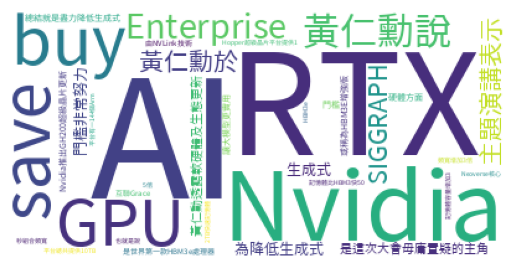

In [23]:
wd = wordcloud.WordCloud(font_path = "TaipeiSans.ttf",background_color = "white")
w = wd.generate(text.cleaned_text)
plt.axis("off")
w.to_file("goose_article.png")
plt.imshow(w)

In [25]:
!pip install langchain openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.3 MB/s eta 0:00:00


In [26]:
from langchain.document_loaders import BSHTMLLoader

In [29]:
import requests

def save_url_as_html(url, filename):
    response = requests.get(url)

    response.raise_for_status()

    with open(filename, 'w', encoding='utf-8') as file:
        file.write(response.text)


url = 'https://technews.tw/2023/08/10/nvidia-and-hugging-face-to-connect-millions-of-developers-to-generative-ai-supercomputing/'
filename = 'temp/01.html'
save_url_as_html(url, filename)

In [31]:
filename = "temp/01.html"
loader = BSHTMLLoader(filename)
data = loader.load()
if os.path.exists(filename):
    os.remove(filename)
data

[Document(page_content='\n\n\n\nNvidia 又發表最強 AI 超算聯手 Hugging Face，黃仁勳開始收大模型稅了 | TechNews 科技新報\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n搜尋：\n\n\n\n\n\n\n\n\n\n登入\n註冊\n\n\n登出\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nVIP會員\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n \n\n\n\n\n\n\n\n\n\n\nMenu\nSkip to content\n\n\n\n\n\n                                搶先看\n\n\n半導體\n\n晶圓\n晶片\nIC 設計\n封裝測試\n處理器\nGPU\n記憶體\n\n\n零組件\n\n光電科技\n面板\n電池\n3C周邊\n\n\n財經\n\nFintech\n加密貨幣\n金融政策\n證券\n財報\n國際貿易\n國際金融\n支付方案\n\n\n網路\n\nAmazon\nFacebook\nGoogle\n資訊安全\n開放資料\n物聯網\n電子商務\n電子娛樂\n雲端\n\n\nAI 人工智慧\n\n自動化\n自駕車\n\n\n尖端科技\n\n奈米\n低軌衛星\n汽車科技\n航太科技\n機器人\n軍事科技\n材料\n無人機\n\n\n環境科學\n\n醫療科技\n生物科技\n科技生活\n科技教育\n\n\n能源科技\n\n太陽能\n風力\n核能\n電力儲存\n\n\n企業永續\n科技人才\n系列專題\n\nAI 顛覆未來，台灣伺服器供應鏈迎來黃金盛世\n矽光子掀產業新浪潮，台灣這次不能再缺席\n從「專」走向「跨」：科技產業如何打